In [3]:
import os
import sys
import math
import scipy as scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.max_columns',30)
label_font_dict = {'family':'sans-serif','size':13.5,'color':'brown','style':'italic'}
title_font_dict = {'family':'sans-serif','size':16.5,'color':'Blue','style':'italic'}

In [5]:
train_bene_df = pd.read_csv("Train_Beneficiarydata-1542865627584.csv")
train_ip_df = pd.read_csv("Train_Inpatientdata-1542865627584.csv")
train_op_df = pd.read_csv("Train_Outpatientdata-1542865627584.csv")
train_bene_df.shape

(138556, 25)

In [6]:
train_bene_df.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [7]:
train_bene_df.dtypes

BeneID                             object
DOB                                object
DOD                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt          

In [8]:
train_bene_df.head()


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


In [9]:
train_bene_df['BeneID'].nunique()

138556

In [10]:
train_bene_df['Gender']

0         1
1         2
2         1
3         1
4         1
         ..
138551    1
138552    2
138553    2
138554    1
138555    2
Name: Gender, Length: 138556, dtype: int64

In [11]:
train_bene_df['Gender'] = train_bene_df['Gender'].apply(lambda val: 0 if val == 2 else 1)

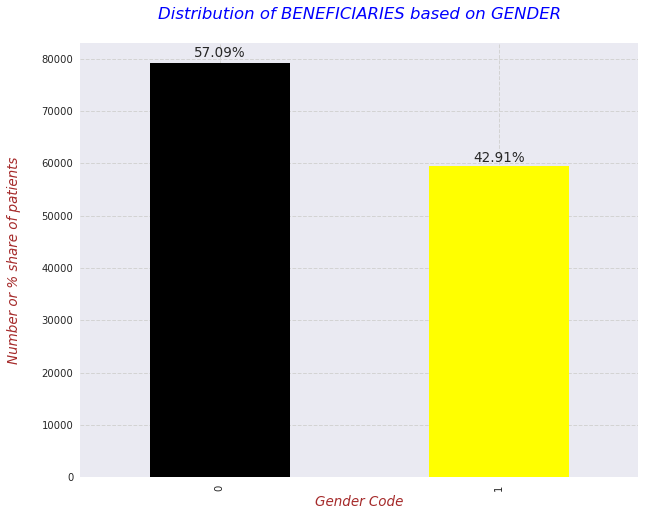

In [12]:
# Here, I'm displaying the distribution of BENEFICIARIES on the basis of GENDER 
with plt.style.context('seaborn'):
  plt.figure(figsize=(10,8))
  fig = train_bene_df['Gender'].value_counts().plot(kind='bar', color=['black','yellow'])
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/train_bene_df.shape[0],2))+"%"}', (x + width/2, y + height*1.015), ha='center', fontsize=13.5)
  # Providing the labels and title to the graph
  plt.xlabel("Gender Code", fontdict=label_font_dict)
  plt.ylabel("Number or % share of patients\n", fontdict=label_font_dict)
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Distribution of BENEFICIARIES based on GENDER\n", fontdict=title_font_dict)

In [13]:
train_bene_df = pd.read_csv("Train_Beneficiarydata-1542865627584.csv")
train_ip_df = pd.read_csv("Train_Inpatientdata-1542865627584.csv")
train_op_df = pd.read_csv("Train_Outpatientdata-1542865627584.csv")
train_tgt_lbls_df = pd.read_csv("Train-1542865627584.csv")
train_tgt_lbls_df.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [14]:
print("### The unique number of providers are {}. ###".format(train_tgt_lbls_df.shape[0]))


### The unique number of providers are 5410. ###


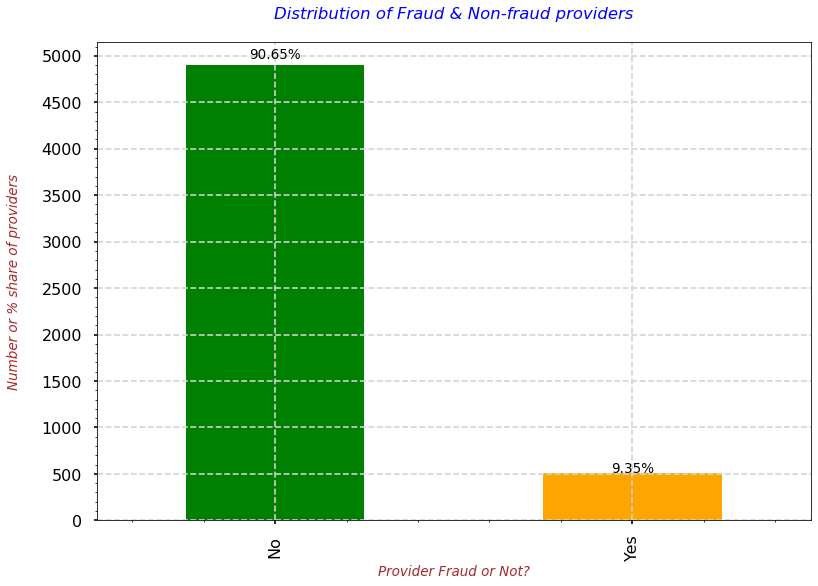

In [15]:
with plt.style.context('seaborn-poster'):
    fig = train_tgt_lbls_df["PotentialFraud"].value_counts().plot(kind='bar', color=['green','orange'])
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/train_tgt_lbls_df.shape[0],2))+"%"}', (x + width/2, y + height*1.015), ha='center', fontsize=13.5)
    # Providing the labels and title to the graph
    plt.xlabel("Provider Fraud or Not?", fontdict=label_font_dict)
    plt.ylabel("Number or % share of providers\n", fontdict=label_font_dict)
    plt.yticks(np.arange(0,5100,500))
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("Distribution of Fraud & Non-fraud providers\n", fontdict=title_font_dict)
    plt.plot();

In [16]:
train_ip_df["Admitted?"] = 1

In [17]:
train_ip_df.head()


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,...,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Admitted?
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,...,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,...,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,...,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,...,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,1
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,...,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,1


In [18]:
train_op_df["Admitted?"] = 0

In [19]:
train_op_df.head()


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Admitted?
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,0
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380,0
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,0


In [20]:
# Commom columns must be 28
common_cols = [col for col in train_ip_df.columns if col in train_op_df.columns]
len(common_cols)

28

In [21]:
# Merging the IP and OP dataset on the basis of common columns
train_ip_op_df = pd.merge(left=train_ip_df, right=train_op_df, left_on=common_cols, right_on=common_cols, how="outer")
train_ip_op_df.shape


(558211, 31)

In [22]:
train_ip_op_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,...,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Admitted?
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,...,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,...,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,...,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,...,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,1
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,...,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,1


In [23]:
# Joining the IP_OP dataset with the BENE data
train_ip_op_bene_df = pd.merge(left=train_ip_op_df, right=train_bene_df, left_on='BeneID', right_on='BeneID',how='inner')
train_ip_op_bene_df.shape

(558211, 55)

In [24]:
# Joining the IP_OP_BENE dataset with the Tgt Label Provider Data
train_iobp_df = pd.merge(left=train_ip_op_bene_df, right=train_tgt_lbls_df, left_on='Provider', right_on='Provider',how='inner')
train_iobp_df.shape

(558211, 56)

In [25]:
train_iobp_df.shape

(558211, 56)

In [26]:
# Unique Providers
train_iobp_df["Provider"].nunique()

5410

In [27]:
# Unique Claim numbers
train_iobp_df["ClaimID"].nunique()


558211

In [28]:
 #Therefore, it is a big assumption to make that all the claims filed by a potentially fraud provider are fraudulent.

In [29]:
prvs_claims_df = pd.DataFrame(train_iobp_df.groupby(['Provider'])['ClaimID'].count()).reset_index()
prvs_claims_tgt_lbls_df = pd.merge(left=prvs_claims_df, right=train_tgt_lbls_df, on='Provider', how='inner')
prvs_claims_tgt_lbls_df

,Provider,ClaimID,PotentialFraud
0,PRV51001,25,No
1,PRV51003,132,Yes
2,PRV51004,149,No
3,PRV51005,1165,Yes
4,PRV51007,72,No
...,...,...,...
5405,PRV57759,28,No
5406,PRV57760,22,No
5407,PRV57761,82,No
5408,PRV57762,1,No


In [30]:
# As shown in the above table, PRV51005 has filed 1165 claims so after joining the datasets all of these will be marked as Fraud. 

     PotentialFraud
No           345415
Yes          212796 



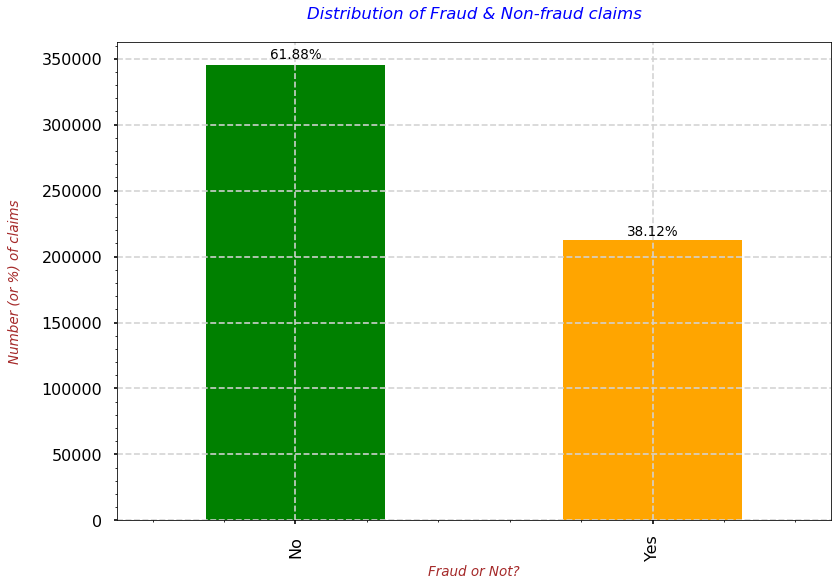

In [31]:
print(pd.DataFrame(train_iobp_df['PotentialFraud'].value_counts()), "\n")

with plt.style.context('seaborn-poster'):
    fig = train_iobp_df['PotentialFraud'].value_counts().plot(kind='bar', color=['green','orange'])
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/train_iobp_df.shape[0],2))+"%"}', (x + width/2, y + height*1.015), ha='center', fontsize=13.5)
    # Providing the labels and title to the graph
    plt.xlabel("Fraud or Not?", fontdict=label_font_dict)
    plt.ylabel("Number (or %) of claims\n", fontdict=label_font_dict)
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("Distribution of Fraud & Non-fraud claims\n", fontdict=title_font_dict)
    plt.plot();

In [32]:
# The above plot shows us that, 62% of claims are Non-Fraud and 32% of them are Fraudulent.
#By looking at the percentages we may say that there is a class-imbalance problem but after looking at the number of records it doesn't seem to be a severe class-imbalance problem.
#So, I'll try some class balancing techniques only after training a baseline model w/o any synthetic or class weighting techniques.

In [33]:
tmp = pd.DataFrame(train_iobp_df.groupby(['State','PotentialFraud'])['BeneID'].count()).reset_index()
tmp.columns = ['State', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp[tmp['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp[tmp['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp['Cases'] = tmp['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp['Percentage'] = round(((tmp['Num_of_cases'] / tmp['Cases']) * 100),2)

tmp.head()

,State,Fraud?,Num_of_cases,Cases,Percentage
0,1,No,6715,345415,1.94
1,1,Yes,3525,212796,1.66
2,2,No,531,345415,0.15
3,2,Yes,207,212796,0.10
4,3,No,7314,345415,2.12


In [79]:
tmp_only_frauds = tmp[tmp['Fraud?'] == 'Yes'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

    Num_of_cases  Percentage
0           8240        3.87
1           4739        2.23
2           4444        2.09
3           3588        1.69
4           3436        1.61
5           3393        1.59
6           2844        1.34
7           2833        1.33
8           2399        1.13
9           2313        1.09
10          2315        1.09
11          2275        1.07
12          2156        1.01
13          2115        0.99
14          2098        0.99
15          2083        0.98
16          2067        0.97
17          2058        0.97
18          2049        0.96
19          1961        0.92
20          1924        0.90
21          1907        0.90
22          1885        0.89
23          1896        0.89
24          1892        0.89 



ValueError: Could not interpret input 'State'

<Figure size 1008x576 with 0 Axes>

In [73]:
# state code - 5 is arkansas

In [74]:
train_bene_df['DOB'] = pd.to_datetime(train_bene_df['DOB'], format="%Y-%m-%d")

In [38]:
train_bene_df['Patient_Age_Year'] = train_bene_df['DOB'].dt.year
train_bene_df['Patient_Age_Month'] = train_bene_df['DOB'].dt.month
bene_age_year_df = pd.DataFrame(train_bene_df['Patient_Age_Year'].value_counts()).reset_index(drop=False)
bene_age_year_df.columns= ['year','num_of_beneficiaries']
bene_age_year_df = bene_age_year_df.sort_values(by='year')



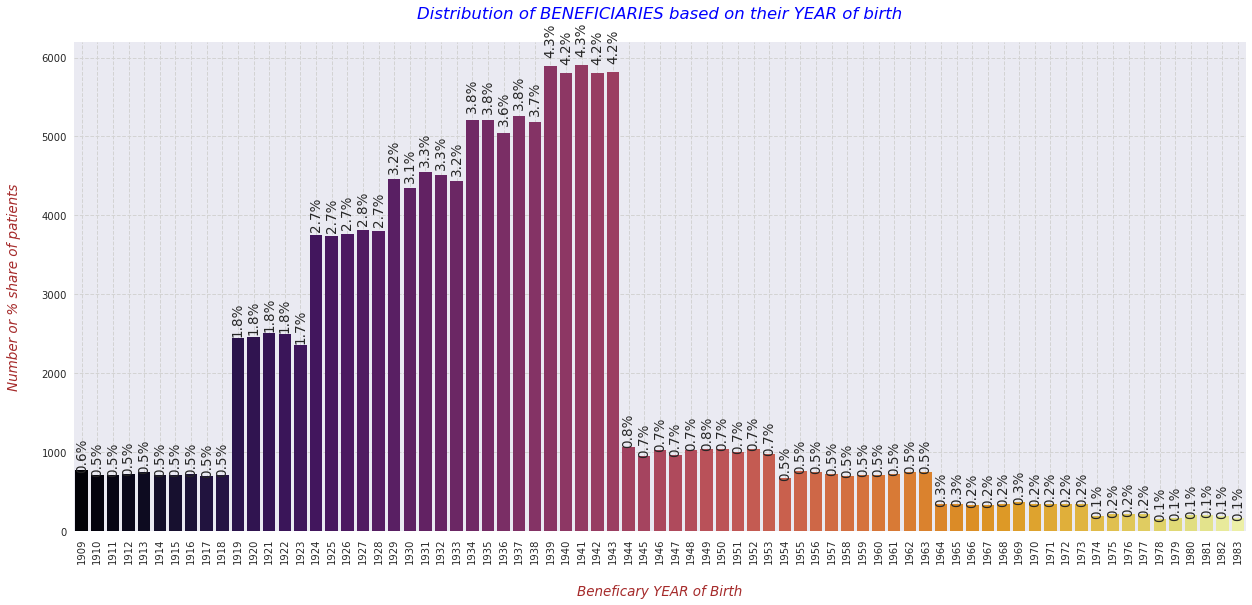

In [39]:
# Here, I'm displaying the distribution of BENEFICIARIES on the basis of their YEAR of Birth 
with plt.style.context('seaborn'):
  plt.figure(figsize=(21,9))
  fig = sns.barplot(data=bene_age_year_df, x='year', y='num_of_beneficiaries', palette='inferno')
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/train_bene_df.shape[0],1))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
  # Providing the labels and title to the graph
  plt.xlabel("\nBeneficary YEAR of Birth", fontdict=label_font_dict)
  plt.xticks(rotation=90)
  plt.ylabel("Number or % share of patients\n", fontdict=label_font_dict)
  plt.minorticks_on()
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.title("Distribution of BENEFICIARIES based on their YEAR of birth\n", fontdict=title_font_dict)

In [40]:
bene_age_month_df = pd.DataFrame(train_bene_df['Patient_Age_Month'].value_counts()).reset_index(drop=False)
bene_age_month_df.columns= ['month','num_of_beneficiaries']
bene_age_month_df = bene_age_month_df.sort_values(by='month')

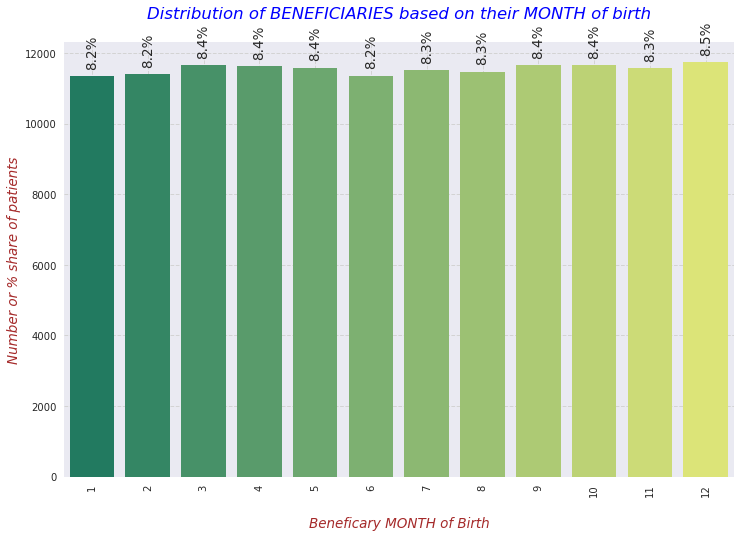

In [41]:
# Here, I'm displaying the distribution of BENEFICIARIES on the basis of their MONTH of Birth 
with plt.style.context('seaborn'):
  plt.figure(figsize=(12,8))
  fig = sns.barplot(data=bene_age_month_df, x='month', y='num_of_beneficiaries', palette='summer')
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/train_bene_df.shape[0],1))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
  # Providing the labels and title to the graph
  plt.xlabel("\nBeneficary MONTH of Birth\n", fontdict=label_font_dict)
  plt.xticks(rotation=90)
  plt.ylabel("Number or % share of patients", fontdict=label_font_dict)
  plt.minorticks_on()
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.title("Distribution of BENEFICIARIES based on their MONTH of birth\n", fontdict=title_font_dict)

In [42]:
train_bene_df.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Age_Year,Patient_Age_Month
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,1943,1
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50,1936,9
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40,1936,8
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,1922,7
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200,1935,9


In [43]:
# 0 means ALIVE and 1 means DEAD
train_bene_df['Dead_or_Alive'] = train_bene_df['DOD'].apply(lambda val: 0 if val != val else 1)

In [44]:
train_bene_df['Dead_or_Alive'].value_counts()

0    137135
1      1421
Name: Dead_or_Alive, dtype: int64

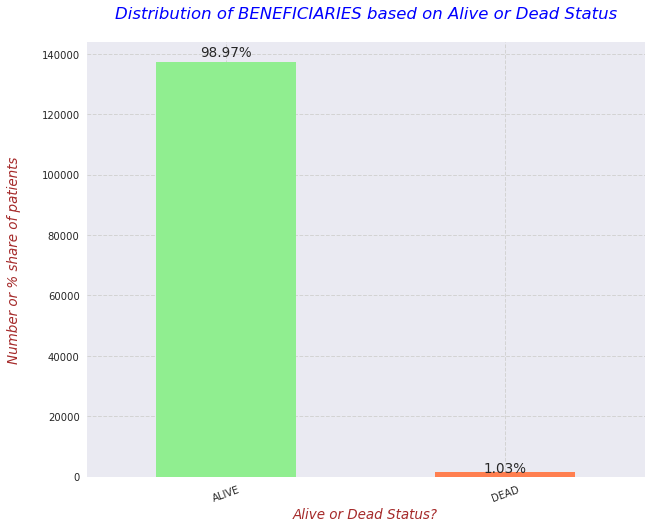

In [45]:
# Here, I'm displaying the distribution of whether BENEFICIARY is ALIVE or NOT?
with plt.style.context('seaborn'):
  plt.figure(figsize=(10,8))
  fig = train_bene_df['Dead_or_Alive'].value_counts().plot(kind='bar', color=['lightgreen','coral'])
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/train_bene_df.shape[0],2))+"%"}', (x + width/2, y + height*1.015), ha='center', fontsize=13.5)
  # Providing the labels and title to the graph
  plt.xlabel("Alive or Dead Status?", fontdict=label_font_dict)
  plt.xticks(labels=["ALIVE","DEAD"], ticks=[0,1], rotation=20)
  plt.ylabel("Number or % share of patients\n", fontdict=label_font_dict)
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Distribution of BENEFICIARIES based on Alive or Dead Status\n", fontdict=title_font_dict)

In [46]:
train_bene_df['DOD'] = pd.to_datetime(train_bene_df['DOD'])


In [47]:
# Greatest Date of Death in the TRAIN set for beneficiaries
max_bene_DOD = max(train_bene_df['DOD'].unique()[1:])
max_bene_DOD

numpy.datetime64('2009-12-01T00:00:00.000000000')

In [48]:
# For all NAN DODs filling the greatest Date of Death
train_bene_df['DOD'].fillna(value=max_bene_DOD, inplace=True)

In [49]:
train_bene_df['AGE'] = np.round(((train_bene_df['DOD'] - train_bene_df['DOB']).dt.days)/365.0,1)


In [50]:
train_bene_df.drop(labels=['DOD'],axis=1,inplace=True)

In [51]:
train_bene_df.head()

,BeneID,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Age_Year,Patient_Age_Month,Dead_or_Alive,AGE
0,BENE11001,1943-01-01,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,1943,1,0,67.0
1,BENE11002,1936-09-01,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50,1936,9,0,73.3
2,BENE11003,1936-08-01,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40,1936,8,0,73.4
3,BENE11004,1922-07-01,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,1922,7,0,87.5
4,BENE11005,1935-09-01,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200,1935,9,0,74.3


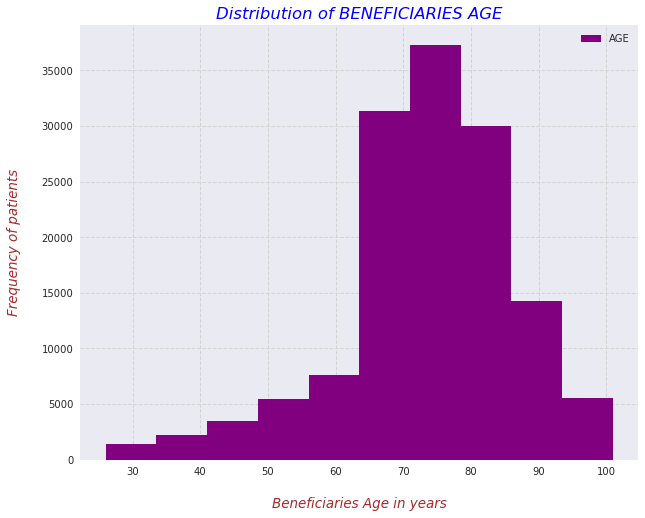

In [52]:
# Here, I'm displaying the distribution of AGE of Beneficiaries?
with plt.style.context('seaborn'):
  plt.figure(figsize=(10,8))
  train_bene_df['AGE'].plot(kind='hist', color='purple')
  # Providing the labels and title to the graph
  plt.xlabel("\nBeneficiaries Age in years", fontdict=label_font_dict)
  plt.ylabel("Frequency of patients\n", fontdict=label_font_dict)
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Distribution of BENEFICIARIES AGE", fontdict=title_font_dict)
  plt.legend();

The above graph tells us that the majority of the beneficiaries are b/w 65 to 85 years.


In [53]:
train_bene_df['AGE'].describe()

count    138556.000000
mean         73.632756
std          12.736605
min          26.000000
25%          68.000000
50%          74.300000
75%          82.000000
max         101.000000
Name: AGE, dtype: float64

In [54]:
def bene_age_brackets(val):
  if val >=1 and val <=40:
    return 'Young'
  elif val > 40 and val <=60:
    return 'Mid'
  elif val > 60 and val <= 80:
    return 'Old'
  else:
    return 'Very Old'

In [55]:

train_iobp_df['DOB'] = pd.to_datetime(train_iobp_df['DOB'], format="%Y-%m-%d")
train_iobp_df['DOD'] = pd.to_datetime(train_iobp_df['DOD'], format="%Y-%m-%d")


In [56]:
# Filling the Null values as MAX Date of Death in the Dataset
train_iobp_df['DOD'].fillna(value=train_iobp_df['DOD'].max(), inplace=True)

In [57]:
train_iobp_df['Bene_Age'] = round(((train_iobp_df['DOD'] - train_iobp_df['DOB']).dt.days)/365,1)


In [58]:
train_iobp_df['AGE_groups'] = train_iobp_df['Bene_Age'].apply(lambda age: bene_age_brackets(age))

In [59]:
tmp = pd.DataFrame(train_iobp_df.groupby(['AGE_groups','PotentialFraud'])['BeneID'].count()).reset_index()
tmp.columns = ['AGE_groups', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp[tmp['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp[tmp['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp['Cases'] = tmp['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp['Percentage'] = round(((tmp['Num_of_cases'] / tmp['Cases']) * 100),2)

tmp.head()


,AGE_groups,Fraud?,Num_of_cases,Cases,Percentage
0,Mid,No,35524,345415,10.28
1,Mid,Yes,21152,212796,9.94
2,Old,No,190334,345415,55.10
3,Old,Yes,116676,212796,54.83
4,Very Old,No,110885,345415,32.10


In [60]:
tmp_only_frauds = tmp[tmp['Fraud?'] == 'Yes'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)


  AGE_groups  Num_of_cases  Percentage
0        Old        116676       54.83
1   Very Old         69780       32.79
2        Mid         21152        9.94
3      Young          5188        2.44 



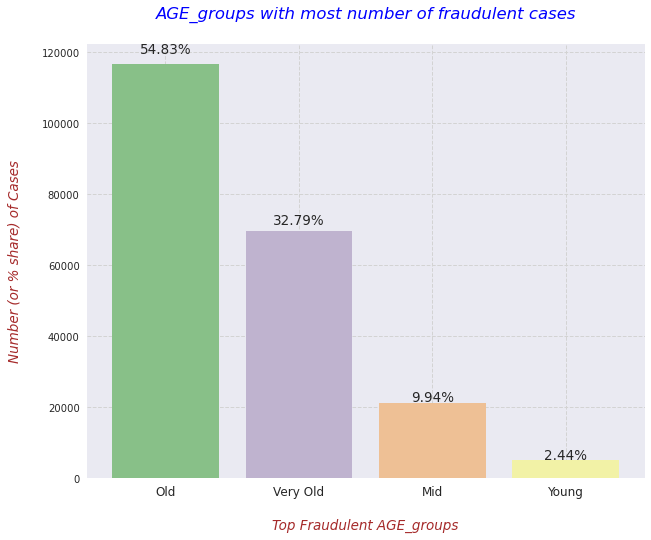

In [61]:
print(tmp_only_frauds[['AGE_groups','Num_of_cases','Percentage']].head(25), "\n")

with plt.style.context('seaborn'):
    plt.figure(figsize=(10,8))
    fig = sns.barplot(data=tmp_only_frauds, x="AGE_groups", y="Num_of_cases", palette='Accent')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=0)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Fraudulent AGE_groups", fontdict=label_font_dict)
    plt.xticks(rotation=0, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("AGE_groups with most number of fraudulent cases\n", fontdict=title_font_dict)
    plt.plot();

In [62]:
tmp_only_non_frauds = tmp[tmp['Fraud?'] == 'No'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

  AGE_groups  Num_of_cases  Percentage
0        Old        190334       55.10
1   Very Old        110885       32.10
2        Mid         35524       10.28
3      Young          8672        2.51 



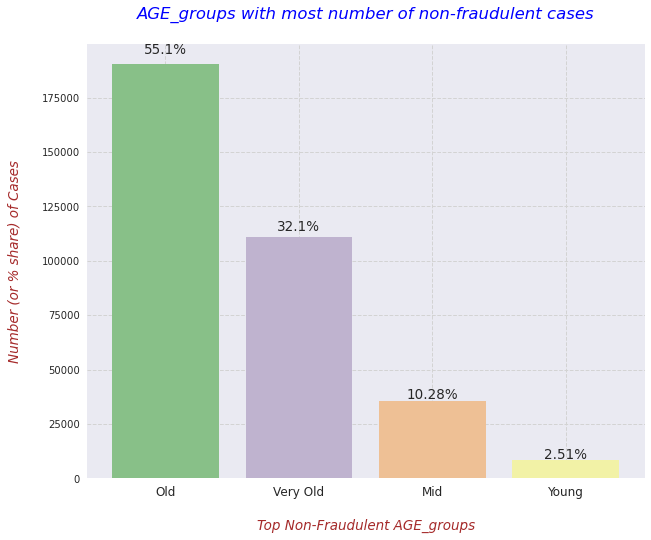

In [63]:
print(tmp_only_non_frauds[['AGE_groups','Num_of_cases','Percentage']].head(25), "\n")

with plt.style.context('seaborn'):
    plt.figure(figsize=(10,8))
    fig = sns.barplot(data=tmp_only_non_frauds, x="AGE_groups", y="Num_of_cases", palette='Accent')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_non_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=0)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Non-Fraudulent AGE_groups", fontdict=label_font_dict)
    plt.xticks(rotation=0, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("AGE_groups with most number of non-fraudulent cases\n", fontdict=title_font_dict)
    plt.plot();

In [64]:
prvs_claims_df = pd.DataFrame(train_iobp_df.groupby(['Provider'])['ClaimID'].count()).reset_index()
prvs_claims_tgt_lbls_df = pd.merge(left=prvs_claims_df, right=train_tgt_lbls_df, on='Provider', how='inner')
prvs_claims_tgt_lbls_df

,Provider,ClaimID,PotentialFraud
0,PRV51001,25,No
1,PRV51003,132,Yes
2,PRV51004,149,No
3,PRV51005,1165,Yes
4,PRV51007,72,No
...,...,...,...
5405,PRV57759,28,No
5406,PRV57760,22,No
5407,PRV57761,82,No
5408,PRV57762,1,No


In [65]:
tmp = pd.DataFrame(train_iobp_df.groupby(['Provider','PotentialFraud'])['BeneID'].count()).reset_index()
tmp.columns = ['Provider', 'Fraud?', 'Num_of_cases']
print(tmp.head())
tot_fraud_cases = tmp[tmp['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp[tmp['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp['Cases'] = tmp['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp['Percentage'] = round(((tmp['Num_of_cases'] / tmp['Cases']) * 100),2)
tmp.head()









   Provider Fraud?  Num_of_cases
0  PRV51001     No            25
1  PRV51003    Yes           132
2  PRV51004     No           149
3  PRV51005    Yes          1165
4  PRV51007     No            72


,Provider,Fraud?,Num_of_cases,Cases,Percentage
0,PRV51001,No,25,345415,0.01
1,PRV51003,Yes,132,212796,0.06
2,PRV51004,No,149,345415,0.04
3,PRV51005,Yes,1165,212796,0.55
4,PRV51007,No,72,345415,0.02


In [66]:
tmp_only_frauds = tmp[tmp['Fraud?'] == 'Yes'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

    Provider  Num_of_cases  Percentage
0   PRV51459          8240        3.87
1   PRV53797          4739        2.23
2   PRV51574          4444        2.09
3   PRV53918          3588        1.69
4   PRV54895          3436        1.61
5   PRV55215          3393        1.59
6   PRV52064          2844        1.34
7   PRV56011          2833        1.33
8   PRV55004          2399        1.13
9   PRV56560          2313        1.09
10  PRV57306          2315        1.09
11  PRV52030          2275        1.07
12  PRV52649          2156        1.01
13  PRV54772          2115        0.99
14  PRV52628          2098        0.99
15  PRV51369          2083        0.98
16  PRV51347          2067        0.97
17  PRV55039          2058        0.97
18  PRV57103          2049        0.96
19  PRV52019          1961        0.92
20  PRV51480          1924        0.90
21  PRV55462          1907        0.90
22  PRV52041          1885        0.89
23  PRV55467          1896        0.89
24  PRV54742          189

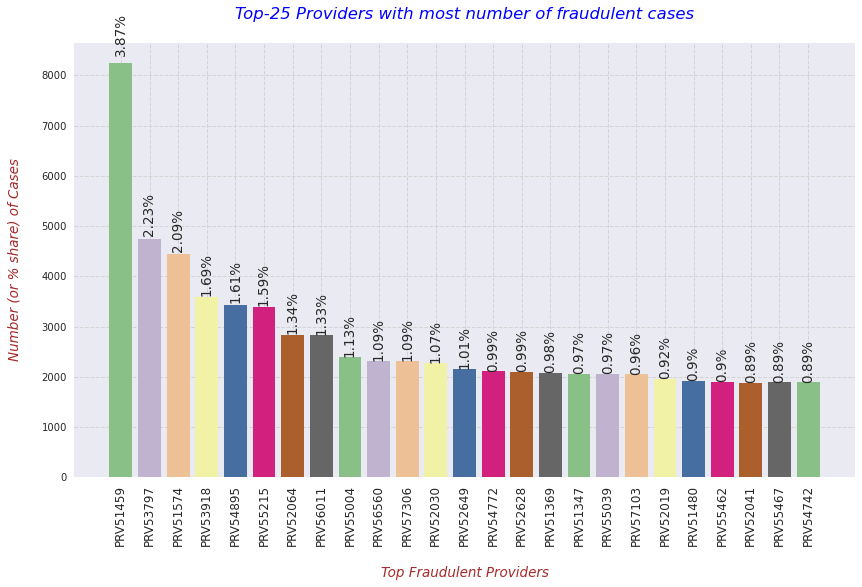

In [67]:
print(tmp_only_frauds[['Provider','Num_of_cases','Percentage']].head(25), "\n")

with plt.style.context('seaborn'):
    plt.figure(figsize=(14,8))
    fig = sns.barplot(data=tmp_only_frauds.iloc[0:25], x="Provider", y="Num_of_cases", palette='Accent')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Fraudulent Providers", fontdict=label_font_dict)
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Top-25 Providers with most number of fraudulent cases\n", fontdict=title_font_dict)
    plt.plot();

In [1]:
#PRV5149 provider has committed the most frauds.

NameError: name 'tmp_only_frauds' is not defined